Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

In [2]:
import pandas as pd 
import numpy as np
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt

import datetime as dt

# Часть I. Приоритизация гипотез

In [3]:
data1 = pd.read_csv('/Users/kirillanosov/Downloads/hypothesis.csv')
data1.describe()
pd.options.display.max_colwidth = 120

In [4]:
data1.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data1['ICE'] = (data1['Impact'] * data1['Confidence']) / data1['Efforts']
data1['ICE'] = round(data1['ICE'])
data1[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


Самыми приоритетными выглядят: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Посмотрим, что нам скажет RICE о приоритетах:

In [6]:
data1['RICE'] = (data1['Reach'] * data1['Impact'] * data1['Confidence']) / data1['Efforts']
data1[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
final = data1[['Hypothesis', 'ICE', 'RICE']]
final

,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,16.2


**"Запустить акцию, дающую скидку на товар в день рождения"**, которая в ICE оказалась самой приоритетной в параметре RICE оказалась не такой важной. Видимо, все дело в малом reach - всего 1. А вот **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** и **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** входят в топ-3 и в ICE и в RICE. На них лучше и сделать упор.



# Часть II. Анализ А/В - теста

In [9]:
orders = pd.read_csv('/Users/kirillanosov/Downloads/orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Переведем столбец date в формат даты:

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
visitors = pd.read_csv('/Users/kirillanosov/Downloads/visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Переведем столбец date в формат даты:

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Создадим массив данных с уникальными значениями пар дат и групп тестирования: 

In [14]:
dateGr = orders[['date', 'group']].drop_duplicates()
dateGr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


Теперь необходимо собрать агрегированные кумулятивные данные по дням о заказах:

In [15]:
ordersAgr = dateGr.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                         .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

Аналогичным образом получим данные о посетителях:

In [16]:
visitorsAgr = dateGr.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

Теперь объединим данные в одну таблицу:

In [17]:
cumData = ordersAgr.merge(visitorsAgr, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumData.columns = ['date', 'group', 'orders', 'customers', 'revenue', 'visitors' ]
cumData.head()

,date,group,orders,customers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


## 1.Построим график кумулятивной выручки по группам:

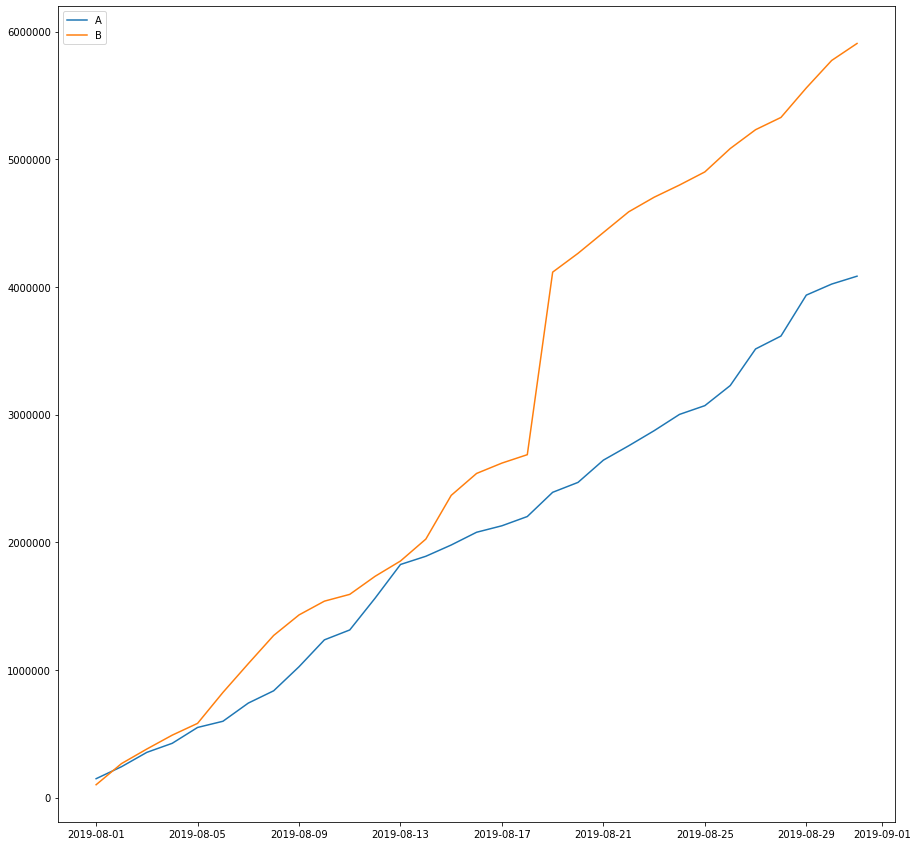

In [18]:
cumRevenueA = cumData[cumData['group'] == 'A'][['date', 'revenue', 'orders']]
cumRevenueB = cumData[cumData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15,15))
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label = 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label = 'B')
plt.legend()


Графики со временем растут, а это хорошо. Но если группа А растет стабильно, без резкиз всплесков, то группа В неожиданно выросла. Этот вплеск проанализируем позже



## 2. Построим графики кумулятивного среднего чека по группам:

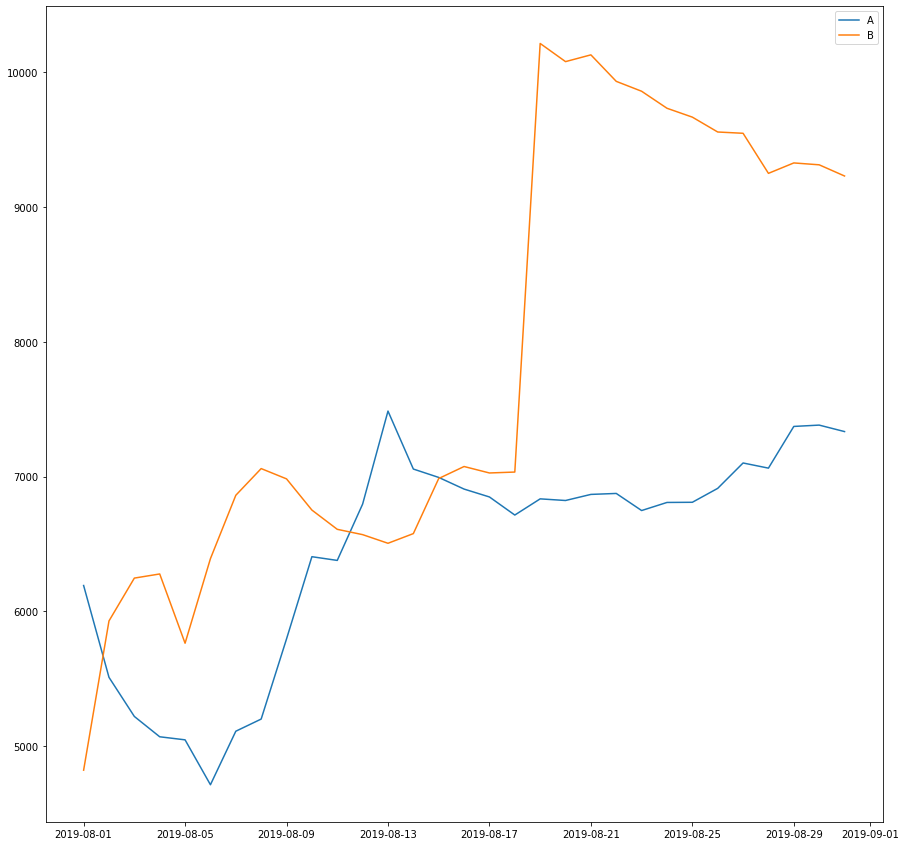

In [19]:
plt.figure(figsize=(15,15))
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'] / cumRevenueA['orders'], label = 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'] / cumRevenueB['orders'], label = 'B')
plt.legend()

Очень по разному распределены срежние чеки у двух групп. У группы В средний чек резко растет примерно в том же месте, что и выручка, значит это все взимосвязано. 

## 3. Построим график относительного среднего чека группы В к группе А:

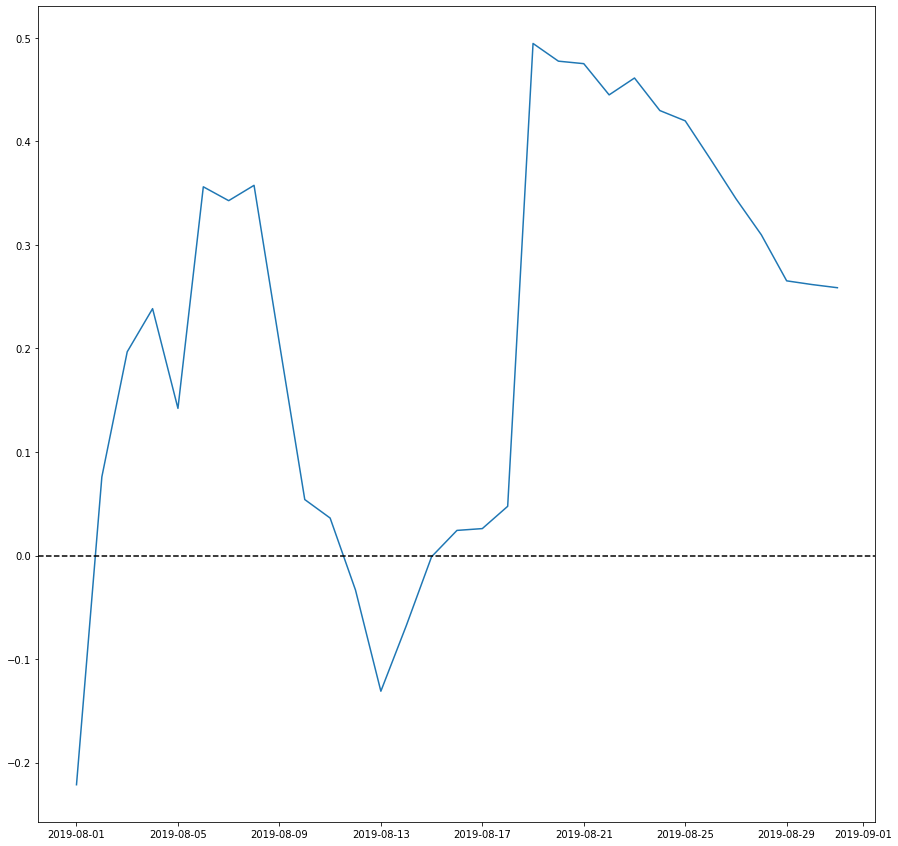

In [20]:
mergeCumRev = cumRevenueA.merge(cumRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
plt.figure(figsize=(15,15))
plt.plot(mergeCumRev['date'],
        (mergeCumRev['revenueB'] / mergeCumRev['ordersB']) / (mergeCumRev['revenueA'] / mergeCumRev['ordersA']) -1)
plt.axhline(y = 0, color = 'black', linestyle = '--')

График различия сильно скачет, очевидно, что были очень крупные заказы.



## 4. Построим график кумулятивной конвресии по группам:

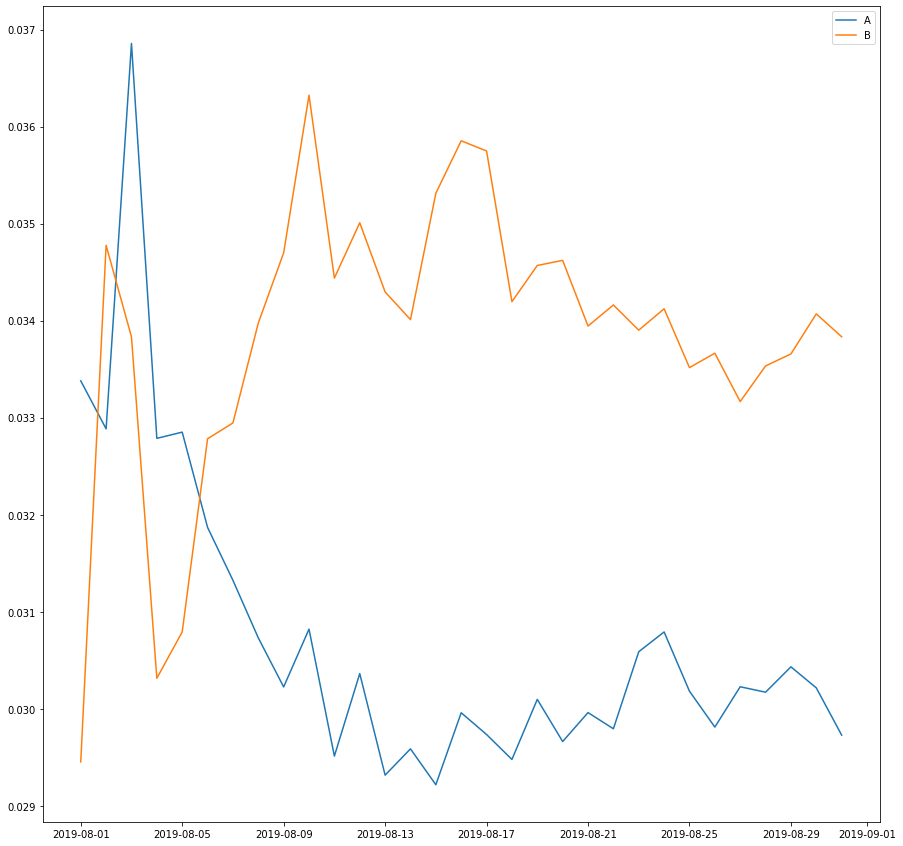

In [21]:
cumData['conversion'] = cumData['orders'] / cumData['visitors']

cumDataA = cumData[cumData['group'] == 'A']

cumDataB = cumData[cumData['group'] == 'B']
plt.figure(figsize=(15,15))
plt.plot(cumDataA['date'], cumDataA['conversion'], label = 'A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label = 'B')
plt.legend()


График получился несимметричным, у группы В ковнверсия выше. Хотя изначально была выше у А

## 5. Построим график относительного изменения кумулятивной конверсии:

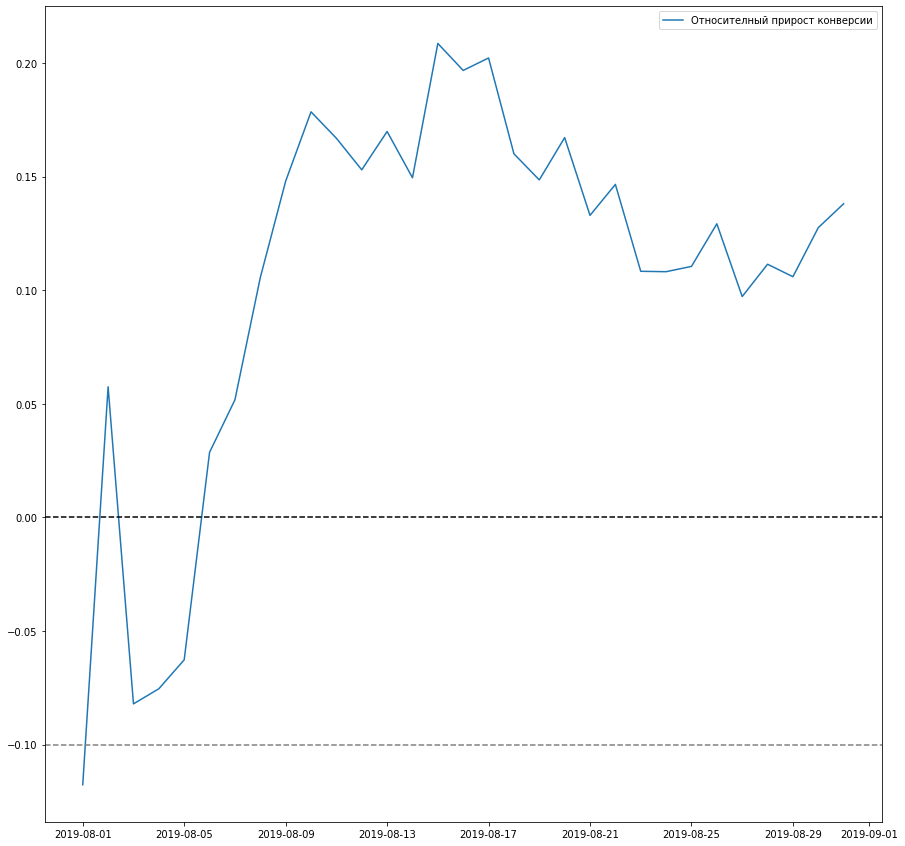

In [22]:
mergeCumConv = cumDataA[['date', 'conversion']].merge(cumDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.figure(figsize=(15,15))
plt.plot(mergeCumConv['date'], mergeCumConv['conversionB'] / mergeCumConv['conversionA'] -1, label = "Относителный прирост конверсии")
plt.legend()

plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = -0.1, color = 'grey', linestyle = '--')

Конвресия В проигрывала А в самом начале, но затем стабильно ее опережает



## 6. Точечный график количества заказов по пользователям:

In [23]:
ordersbyU = orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('visitorId', as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersbyU.columns = ['customer', 'orders']
ordersbyU.sort_values(by = 'orders', ascending = False)

,customer,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


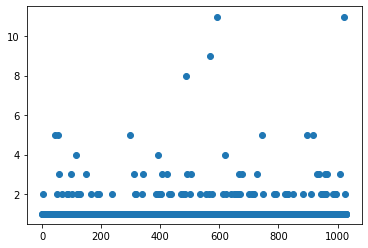

In [24]:
x_values = pd.Series(range(0, len(ordersbyU)))
plt.scatter(x_values, ordersbyU['orders'])

Есть много пользователей с 2-3 заказами, посмотрим в слежующем пункте пользователей с каким количеством заказов считать аномальными

## 7. Посчитаем 95 и 99 перцентили количества заказов:

In [25]:
np.percentile(ordersbyU['orders'], [95, 99])

array([2., 4.])

Полчается, что только 1% пользователей оформляли более 4 заказов. Выберем в качестве нижней границы 3 заказа

## 8. Посчитаем точечный график стоимости заказов:

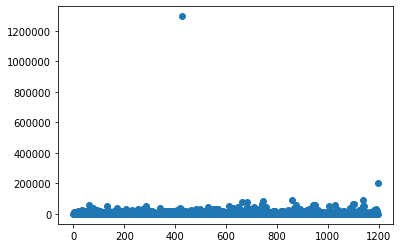

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Выбросов в целом не очень много, основной массив заказов до 100000. Явных выбросов 2: одна покупка в районе 190000-200000 тысяч и ожна покупка свыше 1200000. Эти выбросы явно повлияли на показатели среднего чека. Лучше будет очистить данные от этих аномалий, чтобы иметь возможность увидеть полную картину



## 9. Посчитаем 95 и 99 перцентили стоимсти заказов:

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только 5% покупок имели чек свыше 28000. У 1% заказы от 58000. Возьмем 30000 за нижнюю границу

## 10. Посчитаем статистическую значимость различий в конверсиях в "сырых" данных:

Создадим массив данных, где укажем количество посетителей в день из разных групп:

In [28]:
visitorsAd = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsAd.columns = ['date', 'perdateA']

visitorsBd = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBd.columns = ['date', 'perdateB']


Укажем пользователей, которые хотя бы раз покупали в ordersByUA и ordersByUB:

In [29]:
ordersByUA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersByUA.columns = ['user', 'orders']

ordersByUB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersByUB.columns = ['user', 'orders']


Объявим две переменные - sampleA и sampleB - где пользователям из разных групп будет соответсвовать количесвто заказов:

In [30]:
sampleA = pd.concat([ordersByUA['orders'], pd.Series(0, index = np.arange(visitorsAd['perdateA'].sum() - len(ordersByUA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUB['orders'], pd.Series(0, index = np.arange(visitorsBd['perdateB'].sum() - len(ordersByUB['orders'])), name = 'orders')], axis = 0)

Мы уже знаем, что у нас есть аномальные выбросы, поэтому уместно будет применить критерий **Манна-Уитни**:

In [32]:

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


Гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Но относительный выигрыш группы В - 13.8%

## 11. Посчитаем статистическую занчимость различий в среднем чеке между группами:

In [33]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() -1))

0.365
0.259


Причин отвергать нулевую гипотезу опять нет, в среднем чеке различий нет. Но средний чек В знасительно больше среднего чека А - на 25.9%

## 12. Посчитаем статистическую значимость различий в конверсиях в "очищенных" данных:

Для начала надо почистить даные от аномальных клиентов. Аномальными будем считать тех, кто соверщил более 3 заказов или заказад на сумму более 30000

In [30]:
userManyO = pd.concat([ordersByUA[ordersByUA['orders'] > 3]['user'], ordersByUB[ordersByUB['orders'] > 3]['user']], axis = 0)
userExpensive = orders[orders['revenue'] > 30000]['visitorId']

Посчитаем, сколько всего было таких аномальных пользователей:

In [31]:
anomaly = pd.concat([userManyO, userExpensive], axis = 0).drop_duplicates().sort_values()
print(anomaly.head())
anomaly.shape

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64


(57,)

**57** аномальных пользователей

Теперь посчитаем статистическую значимость различий в конверсиях в очищенных данных:

In [32]:
filteredA = pd.concat([ordersByUA[np.logical_not(ordersByUA['user'].isin(anomaly))]['orders'], pd.Series(0, index = np.arange(visitorsAd['perdateA'].sum() - len(ordersByUA['orders'])), name = 'orders')], axis = 0)

filteredB = pd.concat([ordersByUB[np.logical_not(ordersByUB['user'].isin(anomaly))]['orders'], pd.Series(0, index = np.arange(visitorsBd['perdateB'].sum() - len(ordersByUB['orders'])), name = 'orders')], axis = 0)



In [33]:
print("{0:.3f}".format(stats.mannwhitneyu(filteredA, filteredB)[1]))
print("{0:.3f}".format(filteredB.mean() / filteredA.mean() - 1))

0.009
0.148


Результаты практически не изменились, цифры даже выросли: ранее выигрыш группы В составлял 13.8%, теперь 14.8%



## 13. Посчитаем статистическую занчимость различий в среднем чеке между группами "очищенных" данных:

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(anomaly)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitorId'].isin(anomaly)))]['revenue'])[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(anomaly)))]['revenue'].mean() /
                      orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(anomaly)))]['revenue'].mean() - 1))

0.479
-0.020


p-value даже увеличилось, но это не главное. Средний чек В теперь меньше А на 2%, а был больше на 25%!



## 14. Выводы по тесту:

Что получается:

 - Нет статистически значимого различия по конверсии между "сырыми" и "очищенными" данными
 - По среднему чеку различия есть, в "сырых" данным средний чек В превышал А на 25%, а в "очищенных" данных устпуает на 2%
 - График различия конверсии между группами показывает, что у В прирост конверсии стабильно лучше, чем у А
 - График различия среднего чека показывает, что данные колеблятся - то В выше, то ниже. Это подтверждает и рассчет среднего чека по "очищенным" данным и "сырым": в "сырых" данных средний чек В выше, но в "очищенных" ниже.
 
С одной стороны, за В говорят высокие показатели конверсии, но с другой жутко нестабильный средний чек. Я считаю, что нужно продолжить эксперимент, чтобы подробнее рассмотреть изменения среднего чека в группе В